In [26]:
#importing all necessary libraries
import pandas as pd
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

In [31]:
#creating a framese of .csv file
data = pd.read_csv('detailVolDownsampled.csv')

,Realtime,Unnamed: 0,Record ID,Auxiliary channel TU1 T(°C),Gap of Temperature
0,2020-10-10 20:03:00,11.380952,12.380952,27.723810,0.0
1,2020-10-10 20:04:00,52.500000,53.500000,28.043333,0.0
2,2020-10-10 20:05:00,112.500000,113.500000,28.380000,0.0
3,2020-10-10 20:06:00,172.500000,173.500000,28.738333,0.0
4,2020-10-10 20:07:00,232.500000,233.500000,28.975000,0.0
...,...,...,...,...,...
7638,2020-10-16 03:21:00,416430.500000,458384.500000,28.400000,0.0
7639,2020-10-16 03:22:00,416490.500000,458444.500000,28.400000,0.0
7640,2020-10-16 03:23:00,416550.500000,458504.500000,28.400000,0.0
7641,2020-10-16 03:24:00,416610.500000,458564.500000,28.400000,0.0


In [45]:
# Specifications of the filter
f1 = int(data['Auxiliary channel TU1 T(°C)'].min()) # Frequency of 1st signal
f2 = int(data['Auxiliary channel TU1 T(°C)'].max()) # Frequency of 2nd signal
N = 100  # Order of the filter
  
  
#Generate the time vector of 1 sec duration
t = np.linspace(0, 1, 1000)  # Generate 1000 samples in 1 sec
  
# Generate the signal containing f1 and f2
sig = np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t)

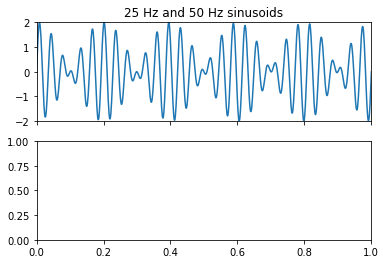

In [67]:
# Display the signal
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(t, sig)
ax1.set_title('25 Hz and 50 Hz sinusoids')
ax1.axis([0, 1, -2, 2])

  
# Design the Butterworth filter using 
# signal.butter and output='sos'
sos = signal.butter(50, 35,'lowpass', fs=1000, output='sos')

In [68]:
# Filter the signal by the filter using signal.sosfilt
# Use signal.sosfiltfilt to get output inphase with input
filtered = signal.sosfiltfilt(sos, sig)
  
  
# Display the output signal
ax2.plot(t, filtered)
ax2.set_title('After 35 Hz Low-pass filter')
ax2.axis([0, 1, -2, 2])
ax2.set_xlabel('Time [seconds]')
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>